## HW 9 - solution

1. Write a function that output the first n numbers, storing in a list,  in the sequence given by the following iteration rules, 

\begin{equation}
x_{n+1} = r x_{n} (1-x_n)
\end{equation}


where $r$ and $x_0$ should be given as the input of the function. This is called [logistic map ](https://en.wikipedia.org/wiki/Bifurcation_diagram). (4pt)

In [3]:
def logistic_map(r,x,n):
    x_list=[x]
    for i in range(n):
        x = r*x*(1-x)
        x_list.append(x)
    return x_list

2. To understand why the logistic map is interesting, follow these steps

   a) Choose two very close initial x0, say 0.3 and 0.301 and set r=2.2. Use the function written in the last problem to get a list of first 100 numbers in the sequence for each initial conditions. Plot the two lists in a figure with title 'r=2.2', xlable 'number of iterations' and ylabel 'x'.
    
   b) Choose the same two initial conditions but for r=3.2. Plot the results again.
    
   c) Choose the same two initial conditions but for r=3.8. Plot the results again.
    
   How does the three cases different from each other? Do the two very close initial conditions lead to similar curves? (6pt)

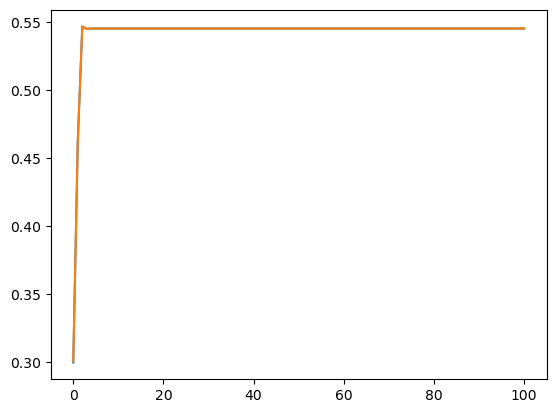

In [5]:
import matplotlib.pyplot as plt
x_list = logistic_map(r=2.2, x=0.3, n=100)
plt.plot(x_list)
x_list = logistic_map(r=2.2, x=0.301, n=100)
plt.plot(x_list)

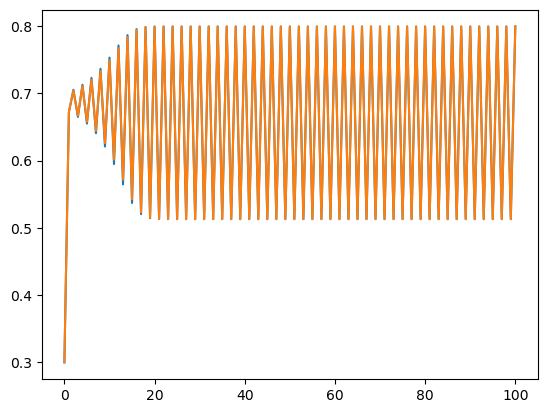

In [6]:
import matplotlib.pyplot as plt
x_list = logistic_map(r=3.2, x=0.3, n=100)
plt.plot(x_list)
x_list = logistic_map(r=3.2, x=0.301, n=100)
plt.plot(x_list)

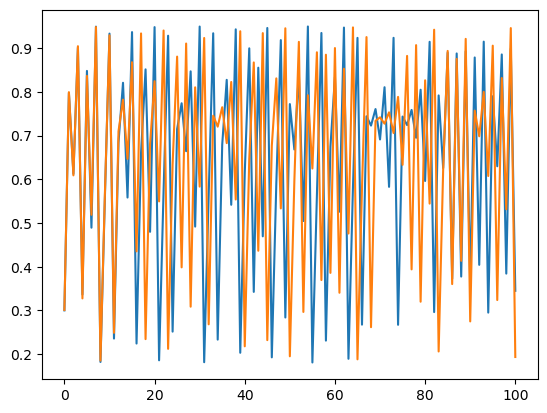

In [7]:
import matplotlib.pyplot as plt
x_list = logistic_map(r=3.8, x=0.3, n=100)
plt.plot(x_list)
x_list = logistic_map(r=3.8, x=0.301, n=100)
plt.plot(x_list)

3. Write a function that simulates a ball moving on the pool table. (Check previous lecture notes) (5pt)

In [14]:
import numpy as np
class Ball:
    def __init__(self,x=0,v=0,a=0,t=0):
        self.x=np.array(x)
        self.v=np.array(v)
        self.a=np.array(a)
        self.t=t
        self.time_list=[]
        self.pos_list=[]
    def move(self,dt):
        self.t=self.t+dt
        self.v=self.v+self.a*dt
        self.x=self.x+self.v*dt
    def record(self): #record the current position and time to the lists
        self.time_list.append(self.t)
        self.pos_list.append(self.x)
    def clear(self): #clear the history
        self.time_list=[]
        self.pos_list=[]
    def plot(self): #draw the path
        plt.plot(self.time_list,self.pos_list)
        plt.xlabel('time')
        plt.ylabel('position')

def pool_table(t_max, num_step, ball, length, width):
    dt = t_max/num_step
    for i in range(num_step):
        ball.move(dt)
        if ball.x[0]<0:
            ball.x[0]=-ball.x[0]
            ball.v[0]=-ball.v[0]
        if ball.x[0]>length:
            ball.x[0]=2*length-ball.x[0]
            ball.v[0]=-ball.v[0]
        if ball.x[1]<0:
            ball.x[1]=-ball.x[1]
            ball.v[1]=-ball.v[1]
        if ball.x[1]>width:
            ball.x[1]=2*width-ball.x[1]
            ball.v[1]=-ball.v[1]
        ball.record()
    

In [20]:
ball=Ball(x=(3,4),v=(1,2))
length=20;width=10
pool_table(30,1000,ball,length,width)

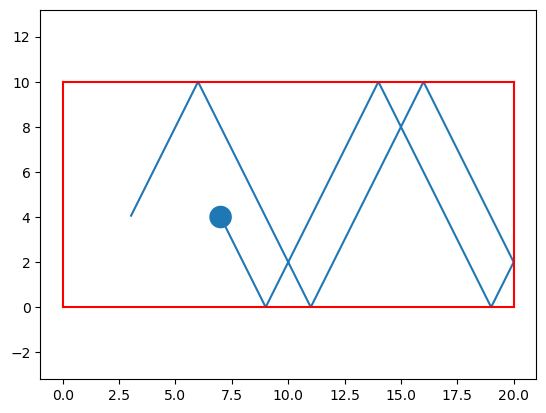

In [38]:
pos = np.array(ball.pos_list);
pos_x = pos[:,0]
pos_y = pos[:,1]
plt.plot(pos_x,pos_y)
plt.plot([0,0],[0,width],'r')
plt.plot([0,length],[0,0],'r')
plt.plot([length,length],[0,width],'r')
plt.plot([0,length],[width,width],'r')
plt.axis('equal')
circle=plt.Circle((pos_x[-1],pos_y[-1]),radius=0.5)
ax = plt.gca()
ax.add_patch(circle)
fig = plt.gcf()

In [44]:
def draw_frame(frame_indx):
    frame_indx=5*frame_indx
    lines = ax.get_lines()
    lines[0].set_data(pos_x[:frame_indx],pos_y[:frame_indx])
    circle.center = (pos_x[frame_indx],pos_y[frame_indx])

In [45]:
import matplotlib.animation as animation
import IPython
anim = animation.FuncAnimation(fig, draw_frame, frames=200, interval=20)
IPython.display.HTML(anim.to_jshtml())

4. Make an animation of the simulation. (5pt) The final exam will have a problem on animation. Please make sure you know how to do it.